<a href="https://colab.research.google.com/github/ElisaCastelli/CPAC_CollectiveDynamicPortrait/blob/main/CPACprovaFaceDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Style transfer notebook

In [1]:
# explain various libraries
import numpy as np
import PIL

import keras
import tensorflow as tf
import tensorflow_hub as hub

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## variables and style mapping

In [2]:
# path where images are stored
image_folder = 'style_pics/'

# here I should receive parameters from spotify
acousticness = 0
valence = 0

In [3]:
def style_chooser(acousticness, valence):
    if acousticness >= 0.5 and valence >= 0.5 :
        return 'monet_poppy.jpg'
    elif acousticness < 0.5 and valence >= 0.5:
        return 'bosch_garden.jpg'
    elif acousticness >= 0.5 and valence < 0.5 :
        return 'van_gogh_patate.jpg'
    elif acousticness < 0.5 and valence < 0.5 :
        return 'cyberpunk_2077.jpg'
    else:
        return 'error'

In [4]:
style_filename = style_chooser(acousticness, valence)
# insert here the image you want to apply style transfer to
content_filename = 'dummy_elisa.jpg'
print('style_filename: ' + style_filename + '\ncontent_filename: ' + content_filename)

style_filename: cyberpunk_2077.jpg
content_filename: dummy_elisa.jpg


## functions

In [5]:
# load and rescale an image
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [6]:
# Converts tensor into image
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [7]:
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

        plt.imshow(image)
    if title:
        plt.title(title)

### load files

In [8]:
# load images
content_image = load_img(image_folder + content_filename)
style_image = load_img(image_folder + style_filename)

# Fast implementation

### apply fast style transer with pre-trained network from magenta


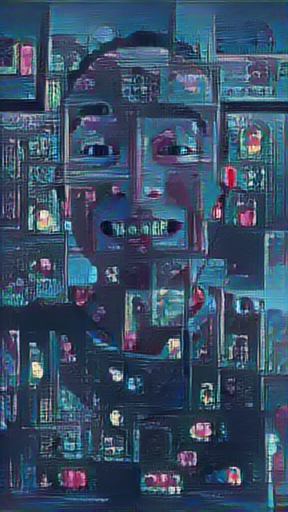

In [9]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
output = tensor_to_image(stylized_image)

output.save(image_folder + 'stylized' +style_filename) 

tensor_to_image(stylized_image)

In [31]:
from numba import cuda

cuda.select_device(0)
cuda.close()

In [ ]:
# restart kernel
import os
os._exit(00)